<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Reciprocal_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-11-8cf5dfa96395>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


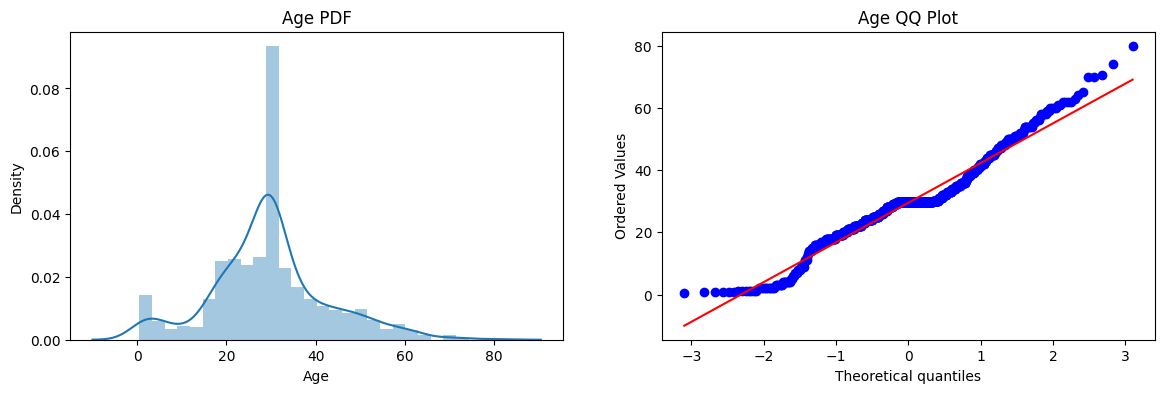

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-12-8664715276c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


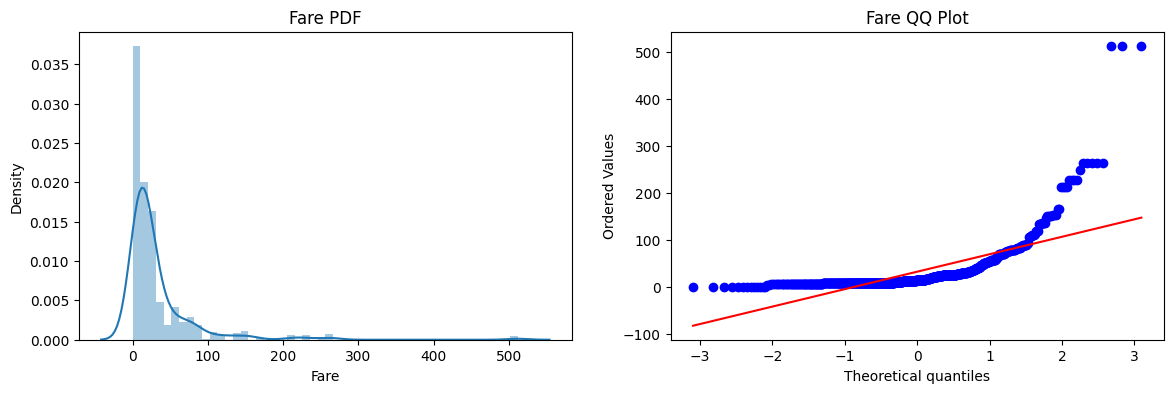

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()


In [14]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()


In [19]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred2=clf2.predict(x_test)
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6871508379888268


In [21]:
trf=FunctionTransformer(np.log1p)

In [22]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [24]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
y_pred=clf.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.7039106145251397


cross validation

In [25]:
x_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,x_transformed,y,cv=10,scoring='accuracy')))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,cv=10,scoring='accuracy')))

LR 0.678027465667915
DT 0.6655930087390762


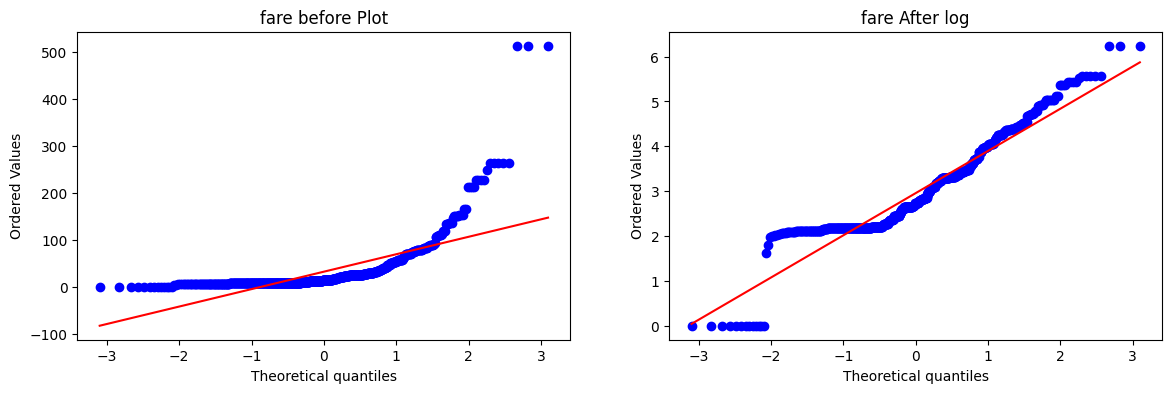

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('fare before Plot')


plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('fare After log')
plt.show()

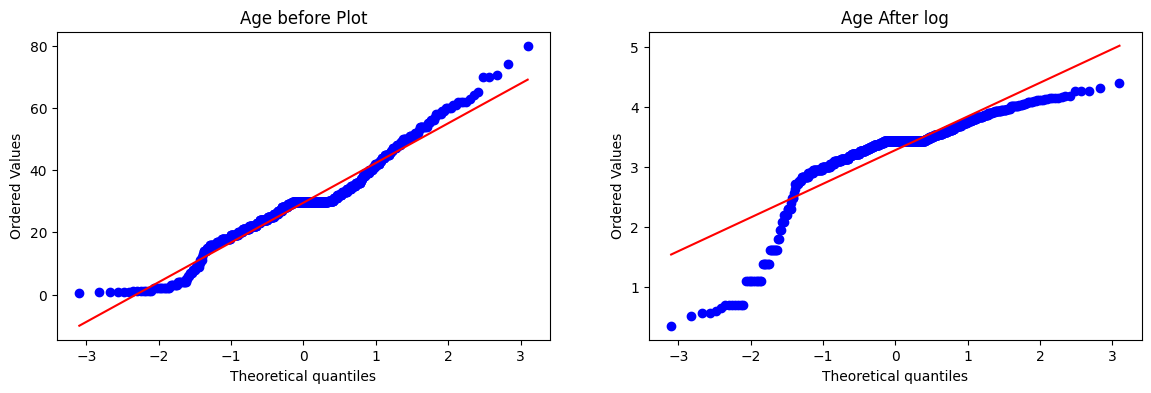

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age before Plot')


plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After log')
plt.show()